In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from utility import check_columns
import scipy.stats as st

In [2]:
income_data = pd.read_csv("./raw_data/income_Distribution_OECD_013021.csv")
income_data.head()

/Users/simonxu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.326,NaN,NaN
1,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.337,NaN,NaN
2,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2016,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.330,NaN,NaN
3,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2018,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.325,NaN,NaN
4,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,...,2004,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.315,NaN,NaN


In [3]:
check_columns(income_data, 5)

Column: LOCATION
--------------------
--- Total Unique Values: 44 ---
SVK    2610
SVN    2610
CZE    2610
LTU    2607
LVA    2586
Min: AUS,  Max: ZAF
Column: Country
--------------------
--- Total Unique Values: 44 ---
Slovenia           2610
Czech Republic     2610
Slovak Republic    2610
Lithuania          2607
Latvia             2586
Min: Australia,  Max: United States
Column: MEASURE
--------------------
--- Total Unique Values: 60 ---
GINI       1937
CPI2015    1937
PPPPRC     1937
CPI2010    1937
MEDIANC    1914
Min: CPI2010,  Max: TRRCTOTAL
Column: Measure
--------------------
--- Total Unique Values: 60 ---
Consumer Price Index (base 2015=100)                  1937
Gini (disposable income, post taxes and transfers)    1937
Purchasing Power Parities for private consumption     1937
Consumer Price Index (base 2010=100)                  1937
Median disposable income (current prices)             1914
Min: Age group 0-17: Poverty rate after taxes and transfers,  Max: Total number of

In [4]:
clean_income = income_data[['LOCATION', 'Country', 'Measure', 'Age group', 'Methodology', 'Year', 'Unit', 'Value']]
clean_income

,LOCATION,Country,Measure,Age group,Methodology,Year,Unit,Value
0,AUS,Australia,"Gini (disposable income, post taxes and transf...",Total population,New income definition since 2012,2012,0-1 scale,0.326
1,AUS,Australia,"Gini (disposable income, post taxes and transf...",Total population,New income definition since 2012,2014,0-1 scale,0.337
2,AUS,Australia,"Gini (disposable income, post taxes and transf...",Total population,New income definition since 2012,2016,0-1 scale,0.330
3,AUS,Australia,"Gini (disposable income, post taxes and transf...",Total population,New income definition since 2012,2018,0-1 scale,0.325
4,AUS,Australia,"Gini (disposable income, post taxes and transf...",Total population,Income definition until 2011,2004,0-1 scale,0.315
...,...,...,...,...,...,...,...,...
66124,BGR,Bulgaria,"Gini (market income, before taxes and transfers)",Retirement age population: above 65,New income definition since 2012,2016,0-1 scale,0.769
66125,BGR,Bulgaria,"Gini (market income, before taxes and transfers)",Retirement age population: above 65,New income definition since 2012,2017,0-1 scale,0.759
66126,BGR,Bulgaria,"Gini (market income, before taxes and transfers)",Retirement age population: above 65,New income definition since 2012,2018,0-1 scale,0.758
66127,SWE,Sweden,Total number of households,Retirement age population: above 65,New income definition since 2012,2018,Number,1346755.000


In [5]:
clean_income["Measure"].value_counts()

Consumer Price Index (base 2015=100)                                                                     1937
Gini (disposable income, post taxes and transfers)                                                       1937
Purchasing Power Parities for private consumption                                                        1937
Consumer Price Index (base 2010=100)                                                                     1937
Median disposable income (current prices)                                                                1914
Poverty rate after taxes and transfers, Poverty line 50%                                                 1910
Total number of individuals                                                                              1884
Poverty rate after taxes and transfers, Poverty line 60%                                                 1876
Mean Poverty gap after taxes and transfers, Poverty line 50%                                             1873
Mean Pover

In [6]:
gini_df = pd.DataFrame()
for column in clean_income.columns:
    gini_df[column] = ""
for index, row in clean_income.iterrows():
    if (row["Measure"]).startswith("Gini"):
        gini_df.loc[index, :]  = row
gini_df

,LOCATION,Country,Measure,Age group,Methodology,Year,Unit,Value
0,AUS,Australia,"Gini (disposable income, post taxes and transf...",Total population,New income definition since 2012,2012,0-1 scale,0.326
1,AUS,Australia,"Gini (disposable income, post taxes and transf...",Total population,New income definition since 2012,2014,0-1 scale,0.337
2,AUS,Australia,"Gini (disposable income, post taxes and transf...",Total population,New income definition since 2012,2016,0-1 scale,0.33
3,AUS,Australia,"Gini (disposable income, post taxes and transf...",Total population,New income definition since 2012,2018,0-1 scale,0.325
4,AUS,Australia,"Gini (disposable income, post taxes and transf...",Total population,Income definition until 2011,2004,0-1 scale,0.315
...,...,...,...,...,...,...,...,...
66122,BGR,Bulgaria,"Gini (market income, before taxes and transfers)",Retirement age population: above 65,New income definition since 2012,2014,0-1 scale,0.735
66123,BGR,Bulgaria,"Gini (market income, before taxes and transfers)",Retirement age population: above 65,New income definition since 2012,2015,0-1 scale,0.74
66124,BGR,Bulgaria,"Gini (market income, before taxes and transfers)",Retirement age population: above 65,New income definition since 2012,2016,0-1 scale,0.769
66125,BGR,Bulgaria,"Gini (market income, before taxes and transfers)",Retirement age population: above 65,New income definition since 2012,2017,0-1 scale,0.759


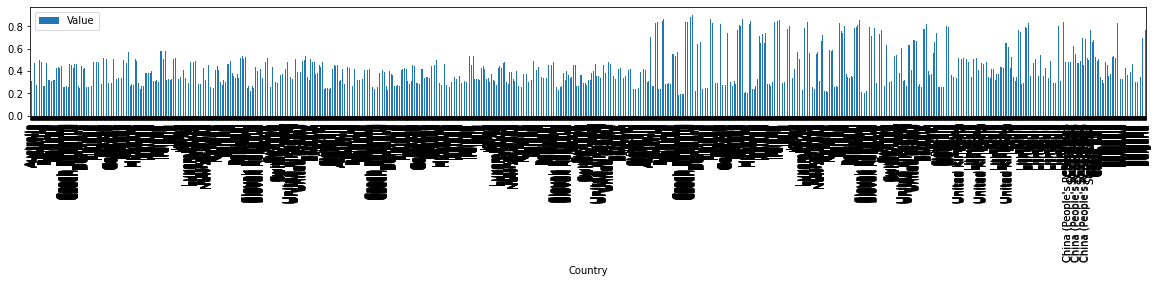

In [7]:
gini_df[["Country", "Value"]].set_index("Country").plot(kind="bar", figsize=(20,2))
plt.show()

In [8]:
gini_years = gini_df["Year"].value_counts().index
print(gini_years.min())
print(gini_years.max())

2004
2019


In [9]:
data_2018_df = ""
df = gini_df[gini_df["Year"] == 2018]
df[df["Age group"] == "Total population"]["Country"].value_counts()

United Kingdom     2
Luxembourg         2
Slovak Republic    2
Slovenia           2
Costa Rica         2
Australia          2
Lithuania          2
Sweden             2
Latvia             2
Romania            2
Belgium            2
Norway             2
Portugal           2
Canada             2
Poland             2
Greece             2
Spain              2
Czech Republic     2
Austria            2
Bulgaria           2
Finland            2
Estonia            2
Korea              2
Hungary            2
France             2
Israel             2
Name: Country, dtype: int64

## Tud data from tud_30012021192028220.csv

In [10]:
tud_df = pd.read_csv("raw_data/tud_30012021192028220.csv")
tud_df

,COU,Country,SOURCE,Source,SERIES,Series,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,HUN,Hungary,ADM,Administrative data,EEM,Employees,1998,1998,NBR,Number,3,Thousands,NaN,NaN,3088.0,NaN,NaN
1,HUN,Hungary,ADM,Administrative data,EEM,Employees,2000,2000,NBR,Number,3,Thousands,NaN,NaN,3256.0,NaN,NaN
2,HUN,Hungary,ADM,Administrative data,EEM,Employees,2001,2001,NBR,Number,3,Thousands,NaN,NaN,3314.0,NaN,NaN
3,HUN,Hungary,ADM,Administrative data,EEM,Employees,2003,2003,NBR,Number,3,Thousands,NaN,NaN,3399.0,NaN,NaN
4,HUN,Hungary,ADM,Administrative data,EEM,Employees,2005,2005,NBR,Number,3,Thousands,NaN,NaN,3367.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,AUS,Australia,ADM,Administrative data,TUM,Union members,2000,2000,NBR,Number,3,Thousands,NaN,NaN,1911.0,NaN,NaN
2515,AUS,Australia,ADM,Administrative data,TUM,Union members,2003,2003,NBR,Number,3,Thousands,NaN,NaN,1890.0,NaN,NaN
2516,AUS,Australia,ADM,Administrative data,TUM,Union members,2008,2008,NBR,Number,3,Thousands,NaN,NaN,1762.0,NaN,NaN
2517,AUS,Australia,ADM,Administrative data,TUM,Union members,2013,2013,NBR,Number,3,Thousands,NaN,NaN,1756.0,NaN,NaN


In [11]:
check_columns(tud_df, 5)

Column: COU
--------------------
--- Total Unique Values: 36 ---
GBR    126
SWE    123
CAN    117
EST    114
NLD    111
Min: AUS,  Max: USA
Column: Country
--------------------
--- Total Unique Values: 36 ---
United Kingdom    126
Sweden            123
Canada            117
Estonia           114
Netherlands       111
Min: Australia,  Max: United States
Column: SOURCE
--------------------
--- Total Unique Values: 2 ---
ADM    1797
SVY     722
Min: ADM,  Max: SVY
Column: Source
--------------------
--- Total Unique Values: 2 ---
Administrative data    1797
Survey data             722
Min: Administrative data,  Max: Survey data
Column: SERIES
--------------------
--- Total Unique Values: 3 ---
TUD    851
EEM    834
TUM    834
Min: EEM,  Max: TUM
Column: Series
--------------------
--- Total Unique Values: 3 ---
Trade union  density    851
Employees               834
Union members           834
Min: Employees,  Max: Union members
Column: TIME
--------------------
--- Total Unique Values: 2

In [12]:
tud_df["Series"].value_counts()

Trade union  density    851
Employees               834
Union members           834
Name: Series, dtype: int64

In [13]:
tud_df[tud_df["COU"] == "USA"]

,COU,Country,SOURCE,Source,SERIES,Series,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
333,USA,United States,SVY,Survey data,EEM,Employees,1998,1998,NBR,Number,3,Thousands,NaN,NaN,121019.0,NaN,NaN
334,USA,United States,SVY,Survey data,EEM,Employees,1999,1999,NBR,Number,3,Thousands,NaN,NaN,123267.0,NaN,NaN
335,USA,United States,SVY,Survey data,EEM,Employees,2000,2000,NBR,Number,3,Thousands,NaN,NaN,126535.0,NaN,NaN
336,USA,United States,SVY,Survey data,EEM,Employees,2001,2001,NBR,Number,3,Thousands,NaN,NaN,126690.0,NaN,NaN
337,USA,United States,SVY,Survey data,EEM,Employees,2002,2002,NBR,Number,3,Thousands,NaN,NaN,126438.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,USA,United States,SVY,Survey data,TUD,Trade union density,2014,2014,PC,Percentage,0,Units,NaN,NaN,10.7,NaN,NaN
2423,USA,United States,SVY,Survey data,TUD,Trade union density,2015,2015,PC,Percentage,0,Units,NaN,NaN,10.6,NaN,NaN
2424,USA,United States,SVY,Survey data,TUD,Trade union density,2016,2016,PC,Percentage,0,Units,NaN,NaN,10.3,NaN,NaN
2425,USA,United States,SVY,Survey data,TUD,Trade union density,2017,2017,PC,Percentage,0,Units,NaN,NaN,10.3,NaN,NaN


In [14]:
tud_df1 = tud_df[tud_df["SERIES"] == "TUD"]


In [15]:
len(tud_df1["COU"].value_counts())

36

In [16]:
tud_df1[tud_df1["SOURCE"] == "ADM"]["Country"].value_counts()

United Kingdom     21
Belgium            21
Italy              21
Germany            21
Norway             21
France             21
Netherlands        21
Japan              21
Finland            21
Denmark            21
Austria            21
Czech Republic     21
Spain              21
Switzerland        20
New Zealand        20
Sweden             20
Estonia            20
Korea              20
Chile              19
Slovak Republic    19
Slovenia           19
Canada             18
Luxembourg         17
Ireland            17
Poland             16
Lithuania          16
Hungary            14
Latvia             14
Turkey             13
Iceland            12
Portugal            9
Australia           7
Greece              7
Mexico              5
Israel              4
Name: Country, dtype: int64

In [17]:
tud_df1[tud_df1["SOURCE"] != "ADM"]["Country"].value_counts()

United Kingdom    21
Canada            21
United States     21
Sweden            21
Australia         19
Ireland           18
Estonia           18
Mexico            17
Iceland           16
Netherlands       16
Korea             15
France            12
Finland           10
Norway             8
Luxembourg         5
Spain              5
Hungary            3
New Zealand        3
Israel             3
Name: Country, dtype: int64

In [18]:
tud_df1[tud_df1["Country"] == "United Kingdom"]

,COU,Country,SOURCE,Source,SERIES,Series,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
948,GBR,United Kingdom,SVY,Survey data,TUD,Trade union density,1998,1998,PC,Percentage,0,Units,NaN,NaN,29.9,NaN,NaN
949,GBR,United Kingdom,SVY,Survey data,TUD,Trade union density,1999,1999,PC,Percentage,0,Units,NaN,NaN,29.7,NaN,NaN
950,GBR,United Kingdom,SVY,Survey data,TUD,Trade union density,2000,2000,PC,Percentage,0,Units,NaN,NaN,29.8,NaN,NaN
951,GBR,United Kingdom,SVY,Survey data,TUD,Trade union density,2001,2001,PC,Percentage,0,Units,NaN,NaN,29.3,NaN,NaN
952,GBR,United Kingdom,SVY,Survey data,TUD,Trade union density,2002,2002,PC,Percentage,0,Units,NaN,NaN,28.8,NaN,NaN
953,GBR,United Kingdom,SVY,Survey data,TUD,Trade union density,2003,2003,PC,Percentage,0,Units,NaN,NaN,29.3,NaN,NaN
954,GBR,United Kingdom,SVY,Survey data,TUD,Trade union density,2004,2004,PC,Percentage,0,Units,NaN,NaN,28.8,NaN,NaN
955,GBR,United Kingdom,SVY,Survey data,TUD,Trade union density,2005,2005,PC,Percentage,0,Units,NaN,NaN,28.6,NaN,NaN
956,GBR,United Kingdom,SVY,Survey data,TUD,Trade union density,2006,2006,PC,Percentage,0,Units,NaN,NaN,28.3,NaN,NaN
957,GBR,United Kingdom,SVY,Survey data,TUD,Trade union density,2007,2007,PC,Percentage,0,Units,NaN,NaN,28.0,NaN,NaN


In [19]:
years = tud_df1["TIME"].value_counts().index
print(years.min())
print(years.max())

1998
2018


In [20]:
working_age_df = pd.read_csv("raw_data/working_age_population.csv")
working_age_df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,WKGPOP,TOT,PC_POP,A,2008,67.499,NaN
1,AUS,WKGPOP,TOT,PC_POP,A,2009,67.505,NaN
2,AUS,WKGPOP,TOT,PC_POP,A,2010,67.386,NaN
3,AUS,WKGPOP,TOT,PC_POP,A,2011,67.226,NaN
4,AUS,WKGPOP,TOT,PC_POP,A,2012,66.930,NaN
...,...,...,...,...,...,...,...,...
611,G20,WKGPOP,TOT,PC_POP,A,2014,68.219,NaN
612,G20,WKGPOP,TOT,PC_POP,A,2015,68.131,NaN
613,G20,WKGPOP,TOT,PC_POP,A,2016,68.013,NaN
614,G20,WKGPOP,TOT,PC_POP,A,2017,67.859,NaN


In [21]:
years = working_age_df["TIME"].value_counts().index
print(years.min())
print(years.max())

2008
2018


## Gini index 
- < 0.2 represents perfect income equality, 
- 0.2–0.3 relative equality, 
- 0.3–0.4 adequate equality, 
- 0.4–0.5 big income gap, 
- above 0.5 represents severe income gap. 
## Therefore, the warning level of Gini index is 0.4.

## Consumer Price Index (CPI) 
- CPI tracks how much the average Canadian household spends, 
- how that changes over time. At the Bank of Canada, we use it to target inflation.
- The CPI is a simple and familiar measure of price changes, or inflation.

## Read union data from ouputfile.csv

In [22]:
union_df = pd.read_csv("raw_data/ouputfile.csv")
union_df.head()

,Unnamed: 0,Country,Source,Series,Year,Unit,Value
0,54,Hungary,Survey data,Trade union density,2004,Percentage,16.8
1,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9
2,56,Hungary,Survey data,Trade union density,2015,Percentage,9.0
3,94,Poland,Administrative data,Trade union density,1999,Percentage,29.1
4,95,Poland,Administrative data,Trade union density,2000,Percentage,24.7


### Check union data on each column

In [23]:
check_columns(union_df, 5)

Column: Unnamed: 0
--------------------
--- Total Unique Values: 851 ---
2260    1
1302    1
1304    1
1305    1
1306    1
Min: 54,  Max: 2511
Column: Country
--------------------
--- Total Unique Values: 36 ---
United Kingdom    42
Sweden            41
Canada            39
Estonia           38
Netherlands       37
Min: Australia,  Max: United States
Column: Source
--------------------
--- Total Unique Values: 2 ---
Administrative data    599
Survey data            252
Min: Administrative data,  Max: Survey data
Column: Series
--------------------
--- Total Unique Values: 1 ---
Trade union  density    851
Min: Trade union  density,  Max: Trade union  density
Column: Year
--------------------
--- Total Unique Values: 21 ---
2008    48
2013    46
2016    45
2010    45
2012    42
Min: 1998,  Max: 2018
Column: Unit
--------------------
--- Total Unique Values: 1 ---
Percentage    851
Min: Percentage,  Max: Percentage
Column: Value
--------------------
--- Total Unique Values: 426 ---
10.8 

## Gini CPI data from gini_cpi.csv

In [24]:
gini_cpi_df = pd.read_csv("raw_data/gini_cpi.csv")
gini_cpi_df.head()

,Unnamed: 0,Country,MEASURE,Age group,Year,Unit Code,Unit,Value
0,0,Australia,GINI,Total population,2012,0_TO_1,0-1 scale,0.326
1,1,Australia,GINI,Total population,2014,0_TO_1,0-1 scale,0.337
2,2,Australia,GINI,Total population,2016,0_TO_1,0-1 scale,0.330
3,3,Australia,GINI,Total population,2018,0_TO_1,0-1 scale,0.325
4,6,Australia,GINI,Total population,2010,0_TO_1,0-1 scale,0.334


In [25]:
check_columns(gini_cpi_df, 5)

Column: Unnamed: 0
--------------------
--- Total Unique Values: 3906 ---
0        1
60799    1
60803    1
62852    1
62266    1
Min: 0,  Max: 66113
Column: Country
--------------------
--- Total Unique Values: 44 ---
Czech Republic     135
Latvia             135
Lithuania          135
Slovak Republic    135
Portugal           135
Min: Australia,  Max: United States
Column: MEASURE
--------------------
--- Total Unique Values: 3 ---
CPI2010    1302
CPI2015    1302
GINI       1302
Min: CPI2010,  Max: GINI
Column: Age group
--------------------
--- Total Unique Values: 3 ---
Working age population: 18-65          1302
Total population                       1302
Retirement age population: above 65    1302
Min: Retirement age population: above 65,  Max: Working age population: 18-65
Column: Year
--------------------
--- Total Unique Values: 11 ---
2011    549
2009    504
2012    486
2010    468
2013    423
Min: 2009,  Max: 2019
Column: Unit Code
--------------------
--- Total Unique Values

### Merge union_df and gini_cpi-df
- Get data of common years, 2009 to 2018
    - union_df includes 21 years, from 1998 to 2018
    - gini_cpi_df includes 11 years, from 2009 to 2019

In [35]:
df = pd.merge(union_df, gini_cpi_df, on=["Country", "Year"], suffixes=("_union", "_gini_cpi"))
df.head()

,Unnamed: 0_union,Country,Source,Series,Year,Unit_union,Value_union,Unnamed: 0_gini_cpi,MEASURE,Age group,Unit Code,Unit_gini_cpi,Value_gini_cpi
0,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7947,GINI,Total population,0_TO_1,0-1 scale,0.241000
1,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7959,GINI,Total population,0_TO_1,0-1 scale,0.272000
2,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7964,CPI2010,Total population,IDX,Index,95.369304
3,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7976,CPI2010,Total population,IDX,Index,95.369304
4,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,29555,GINI,Working age population: 18-65,0_TO_1,0-1 scale,0.245000


### Remove unrelated columns

In [97]:
df_09_18 = df[["Country", "Year", "Value_union", "MEASURE", "Age group", "Value_gini_cpi"]]
df_09_18.head()

,Country,Year,Value_union,MEASURE,Age group,Value_gini_cpi
0,Hungary,2009,11.9,GINI,Total population,0.241000
1,Hungary,2009,11.9,GINI,Total population,0.272000
2,Hungary,2009,11.9,CPI2010,Total population,95.369304
3,Hungary,2009,11.9,CPI2010,Total population,95.369304
4,Hungary,2009,11.9,GINI,Working age population: 18-65,0.245000


### Total population

In [88]:
total_population = df_09_18[df_09_18["Age group"] == "Total population"]

In [90]:
gini_tot = total_population[total_population["MEASURE"] == "GINI"]
gini_tot = gini_tot.drop_duplicates(subset=["Country","Year"])

In [91]:
cpi_tot = total_population[total_population["MEASURE"] != "GINI"]
cpi_tot = cpi_tot.drop_duplicates(subset=["Country","Year"])

In [95]:
data_total = pd.merge(gini_tot, cpi_tot, on=["Country", "Year"])\
                        .drop(columns=["MEASURE_x", "Age group_x", "Value_union_y", "MEASURE_y", "Age group_y"])
data_total = data_total.rename(columns = {
                                                "Value_union_x": "Union %",
                                                "Value_gini_cpi_x": "Gini",
                                                "Value_gini_cpi_y": "CPI"
                                            })
data_total.head()


,Country,Year,Union %,Gini,CPI
0,Hungary,2009,11.9,0.241,95.369304
1,Hungary,2015,9.0,0.284,111.384411
2,Poland,2009,16.3,0.303,97.484226
3,Poland,2010,18.3,0.304,100.000000
4,Poland,2011,17.0,0.301,104.239401


### Working age population: 18~65

In [109]:
working_age = df_09_18[df_09_18["Age group"] == "Working age population: 18-65"]

gini_working = working_age[working_age["MEASURE"] == "GINI"]
gini_working = gini_working.drop_duplicates(subset=["Country","Year"])

cpi_working = working_age[working_age["MEASURE"] != "GINI"]
cpi_working = cpi_working.drop_duplicates(subset=["Country","Year"])

data_working = pd.merge(gini_working, cpi_working, on=["Country", "Year"])\
                        .drop(columns=["MEASURE_x", "Age group_x", "Value_union_y", "MEASURE_y", "Age group_y"])
data_working = data_working.rename(columns = {
                                                "Value_union_x": "Union %",
                                                "Value_gini_cpi_x": "Gini",
                                                "Value_gini_cpi_y": "CPI"
                                            })
data_working



,Country,Year,Union %,Gini,CPI
0,Hungary,2009,11.9,0.245,95.369304
1,Hungary,2015,9.0,0.291,111.384411
2,Poland,2009,16.3,0.305,97.484226
3,Poland,2010,18.3,0.307,100.000000
4,Poland,2011,17.0,0.304,104.239401
...,...,...,...,...,...
269,United States,2013,10.8,0.392,106.833852
270,United States,2014,10.7,0.389,108.566940
271,United States,2015,10.6,0.384,108.695723
272,United States,2016,10.3,0.385,110.067028


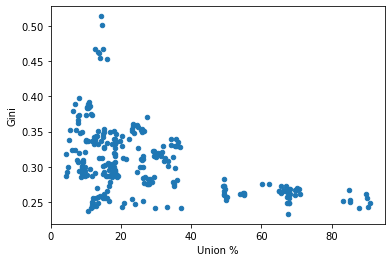

In [102]:
data_working.plot.scatter(x="Union %", y="Gini")

In [130]:
west = ['United Kingdom', 'Spain', 'Austria', 'France', 'Germany', 'Ireland', 'Switzerland', 'Italy', 'Luxembourg', 'Greece', 'Israel'
                 'Netherlands', 'Belgium', 'Australia', 'New Zealand', 'Portugal', 'Turkey', 'Canada']
east =  ['Estonia', 'Czech Republic', 'Latvia', 'Lithuania', 'Hungary', 'Slovak Republic', 'Slovenia', 'Poland'] 
scandinavian = ['Norway', 'Finland' ,'Iceland', 'Sweden', 'Denmark']
us = ['United States']
asia = ['Korea', 'Japan']
latin = ['Mexico', 'Chile']
 

In [148]:
west_df = pd.DataFrame({"Country": west, "Dummy": ""})
east_df = pd.DataFrame({"Country": east})
scand_df = pd.DataFrame({"Country": scandinavian})
us_df = pd.DataFrame({"Country": us})
asia_df = pd.DataFrame({"Country": asia})
latin_df = pd.DataFrame({"Country": latin})


In [186]:
# data_working[data_working["Country"] == west_df["Country"]]

west_filter = pd.merge(data_working, west_df, on=["Country"])
east_filter = pd.merge(data_working, east_df, on=["Country"])
scand_filter = pd.merge(data_working, scand_df, on=["Country"])
us_filter = pd.merge(data_working, us_df, on=["Country"])
asia_filter = pd.merge(data_working, asia_df, on=["Country"])
latin_filter = pd.merge(data_working, latin_df, on=["Country"])

df = {
    "west": {"df": west_filter, "x":0, "y":0},
    "east": {"df": east_filter, "x":0, "y":1},
    "scand": {"df":scand_filter, "x":1, "y":0},
    "us": {"df":us_filter, "x":1, "y":1},
    "asia": {"df":asia_filter, "x":2, "y":0},
    "latin": {"df":latin_filter, "x":2, "y":1}
}

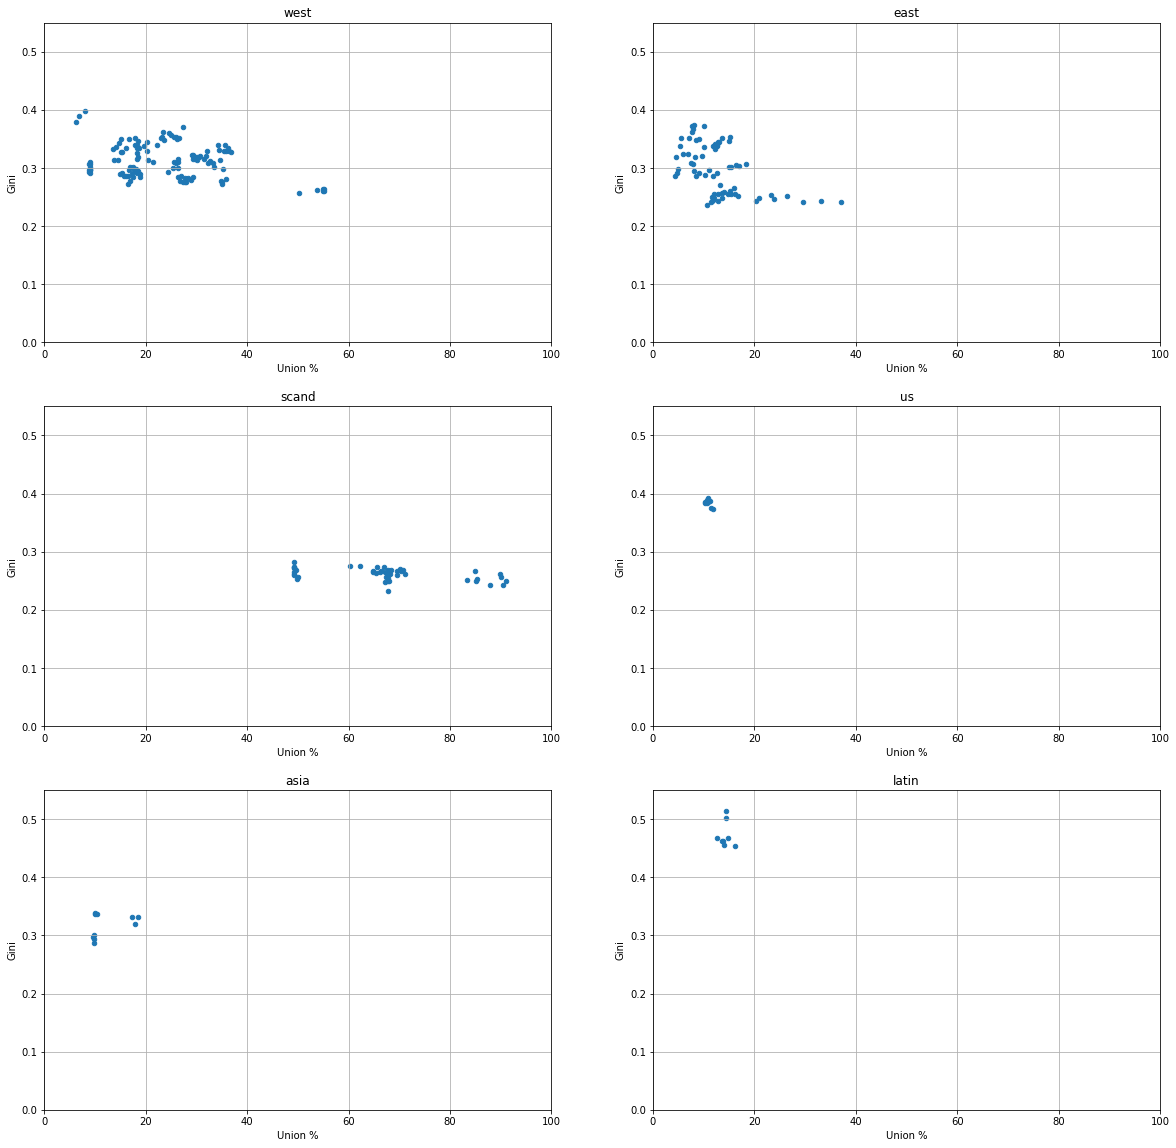

In [204]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

for region in df:
    x_position=df[region]["x"]
    y_position=df[region]["y"]
    df[region]["df"].plot.scatter(x="Union %", y="Gini", ax=ax[x_position][y_position], grid=True)
    ax[x_position][y_position].set_title(region)
    ax[x_position][y_position].set_ylim(0, 0.55)
    ax[x_position][y_position].set_xlim(0, 100)
    
    

In [201]:
data_working

,Country,Year,Union %,Gini,CPI,Group_color,Group
0,Hungary,2009,11.9,0.245,95.369304,,East
1,Hungary,2015,9.0,0.291,111.384411,,East
2,Poland,2009,16.3,0.305,97.484226,,East
3,Poland,2010,18.3,0.307,100.000000,,East
4,Poland,2011,17.0,0.304,104.239401,,East
...,...,...,...,...,...,...,...
269,United States,2013,10.8,0.392,106.833852,,US
270,United States,2014,10.7,0.389,108.566940,,US
271,United States,2015,10.6,0.384,108.695723,,US
272,United States,2016,10.3,0.385,110.067028,,US


In [202]:
data_working["Group"] = ""
for index, row in data_working.iterrows():
    if row["Country"] in west: data_working.loc[index,"Group"] = "West"    
    if row["Country"] in east: data_working.loc[index,"Group"] = "East" 
    if row["Country"] in scandinavian: data_working.loc[index,"Group"] = "Scandinavia"
    if row["Country"] in us: data_working.loc[index,"Group"] = "US" 
    if row["Country"] in asia: data_working.loc[index,"Group"] = "Asia" 
    if row["Country"] in latin: data_working.loc[index,"Group"] = "Latin" 
        
# data_working.plot.scatter(x="Union %", y="Gini", c="Group", colormap="viridis")

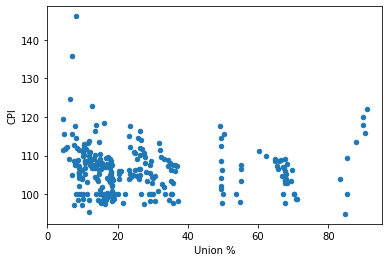

In [103]:
data_working.plot.scatter(x="Union %", y="CPI")

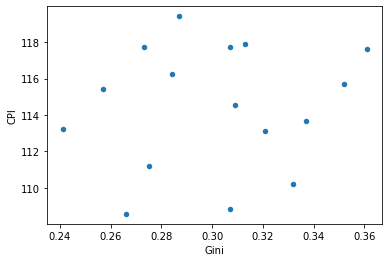

In [105]:
data_working[data_working["Year"] == 2018].plot.scatter(x="Gini", y="CPI")

In [108]:
x = data_working["Gini"]
y = data_working["CPI"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(
                                            ,)
regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=12, color="darkblue")

NameError: name 'x' is not defined

### Retirement age population: above 65

In [101]:
retire = df_09_18[df_09_18["Age group"] == "Retirement age population: above 65"]

gini_retire = retire[retire["MEASURE"] == "GINI"]
gini_retire = gini_retire.drop_duplicates(subset=["Country","Year"])

cpi_retire = retire[retire["MEASURE"] != "GINI"]
cpi_retire = cpi_retire.drop_duplicates(subset=["Country","Year"])

data_retire = pd.merge(gini_retire, cpi_retire, on=["Country", "Year"])\
                        .drop(columns=["MEASURE_x", "Age group_x", "Value_union_y", "MEASURE_y", "Age group_y"])
data_retire = data_retire.rename(columns = {
                                                "Value_union_x": "Union %",
                                                "Value_gini_cpi_x": "Gini",
                                                "Value_gini_cpi_y": "CPI"
                                            })
data_retire.head()


,Country,Year,Union %,Gini,CPI
0,Hungary,2009,11.9,0.196,95.369304
1,Hungary,2015,9.0,0.233,111.384411
2,Poland,2009,16.3,0.262,97.484226
3,Poland,2010,18.3,0.261,100.000000
4,Poland,2011,17.0,0.255,104.239401


### Seperate by gini and cpi to two columns

In [50]:
gini_df = df_09_18[df_09_18["MEASURE"] == "GINI"]
cpi_df = df_09_18[df_09_18["MEASURE"] != "GINI"]
pd.merge(gini_df, cpi_df, on=["Country", "Year", "Age group"], suffixes=("_gini", "_cpi"))


,Country,Year,Value_union_gini,MEASURE_gini,Age group,Value_gini_cpi_gini,Value_union_cpi,MEASURE_cpi,Value_gini_cpi_cpi
0,Hungary,2009,11.9,GINI,Total population,0.241,11.9,CPI2010,95.369304
1,Hungary,2009,11.9,GINI,Total population,0.241,11.9,CPI2010,95.369304
2,Hungary,2009,11.9,GINI,Total population,0.241,11.9,CPI2015,85.621770
3,Hungary,2009,11.9,GINI,Total population,0.241,11.9,CPI2015,85.621770
4,Hungary,2009,11.9,GINI,Total population,0.272,11.9,CPI2010,95.369304
...,...,...,...,...,...,...,...,...,...
5365,United States,2017,10.3,GINI,Total population,0.390,10.3,CPI2015,103.418600
5366,United States,2017,10.3,GINI,Working age population: 18-65,0.383,10.3,CPI2010,112.411595
5367,United States,2017,10.3,GINI,Working age population: 18-65,0.383,10.3,CPI2015,103.418600
5368,United States,2017,10.3,GINI,Retirement age population: above 65,0.411,10.3,CPI2010,112.411595


In [30]:
gini_df = df[df["MEASURE"] == "GINI"]
gini_df

,Unnamed: 0_union,Country,Source,Series,Year,Unit_union,Value_union,Unnamed: 0_gini_cpi,MEASURE,Age group,Unit Code,Unit_gini_cpi,Value_gini_cpi
0,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7947,GINI,Total population,0_TO_1,0-1 scale,0.241
1,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,7959,GINI,Total population,0_TO_1,0-1 scale,0.272
4,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,29555,GINI,Working age population: 18-65,0_TO_1,0-1 scale,0.245
5,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,29567,GINI,Working age population: 18-65,0_TO_1,0-1 scale,0.283
8,55,Hungary,Survey data,Trade union density,2009,Percentage,11.9,42679,GINI,Retirement age population: above 65,0_TO_1,0-1 scale,0.196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,2424,United States,Survey data,Trade union density,2016,Percentage,10.3,37034,GINI,Working age population: 18-65,0_TO_1,0-1 scale,0.385
4009,2424,United States,Survey data,Trade union density,2016,Percentage,10.3,49244,GINI,Retirement age population: above 65,0_TO_1,0-1 scale,0.408
4014,2425,United States,Survey data,Trade union density,2017,Percentage,10.3,21788,GINI,Total population,0_TO_1,0-1 scale,0.390
4016,2425,United States,Survey data,Trade union density,2017,Percentage,10.3,37035,GINI,Working age population: 18-65,0_TO_1,0-1 scale,0.383


KeyError: 'Value_y'

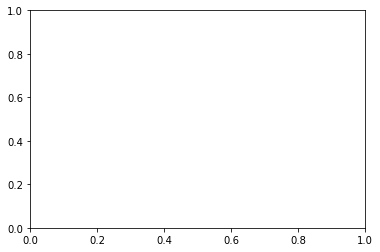

In [31]:

gini_df.plot.scatter(x="Value_y", y="Value_x")
plt.xlabel("Trade Union Density")
plt.ylabel("Gini Value")
plt.title("Gini vs. Trade Union Density")
plt.savefig("images/gini_tud.png")

In [ ]:
cpi_df = df[df["MEASURE"] != "GINI"]
cpi_df

In [ ]:
cpi_df.plot.scatter(x="Value_y", y="Value_x")
plt.xlabel("Trade Union Density")
plt.ylabel("CPI")
plt.title("CPI vs. Trade Union Density")
plt.savefig("images/cpi_tud.png")

In [ ]:
gini_2018_df = gini_df[(gini_df["Year"] == 2018) & (gini_df["Age group"] == "Total population")]
gini_2018_df

In [ ]:
gini_2018_df.plot.bar(x="Country", y="Value_x", figsize=(20,4))

In [ ]:
cpi_2018_df = cpi_df[(cpi_df["Year"] == 2018) & (cpi_df["Age group"] == "Total population")]
cpi_2018_df

In [ ]:
cpi_2018_df.plot.bar(x="Country", y="Value_x", figsize=(20,4))